In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [48]:
dataz=pd.read_csv("Salary_Data.csv")

In [49]:
dataz

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [50]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
dataz.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

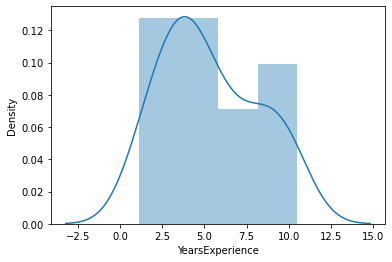

In [52]:
sns.distplot(dataz["YearsExperience"])

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

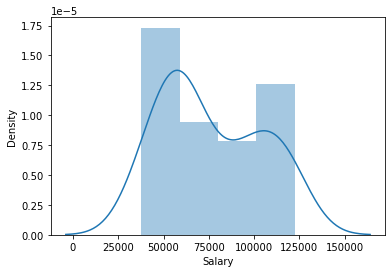

In [53]:
sns.distplot(dataz["Salary"])

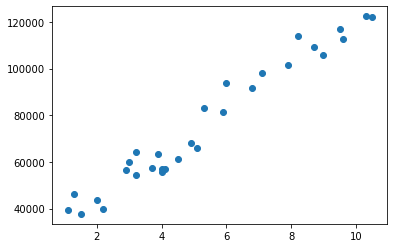

In [54]:
plt.scatter("YearsExperience","Salary",data=dataz)
plt.show()

In [55]:
dataz.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

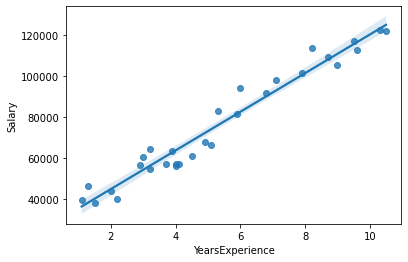

In [56]:
sns.regplot("YearsExperience","Salary",data=dataz)

In [57]:
dataz=dataz.rename({"YearsExperience":"exp","Salary":"salary"},axis=1)

In [58]:
dataz

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [78]:
dataz.max()

exp           10.5
salary    122391.0
dtype: float64

In [79]:
dataz.min()

exp           1.1
salary    37731.0
dtype: float64

### model making

In [59]:
model=smf.ols("salary~exp",data=dataz).fit()

In [60]:
model

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        14:53:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [63]:
# R squared values

(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### using log

In [64]:
model2=smf.ols("salary~np.log(exp)",data=dataz).fit()

In [65]:
model2

In [66]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        14:55:24   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model2.params

Intercept      14927.97177
np.log(exp)    40581.98796
dtype: float64

In [69]:
model2.rsquared,model2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

### by squaring

In [70]:
model3=smf.ols("salary~np.square(exp)",data=dataz).fit()

In [71]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.52e-16
Time:                        14:58:34   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(exp)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model3.params

Intercept         48042.585515
np.square(exp)      776.318773
dtype: float64

In [73]:
model3.rsquared,model3.rsquared_adj

(0.9153198857852565, 0.9122955959918728)

### using squre root

In [74]:
model4=smf.ols("salary~np.sqrt(exp)",data=dataz).fit()

In [75]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           8.57e-18
Time:                        15:02:23   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(exp)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model4.params

Intercept      -16055.769117
np.sqrt(exp)    41500.680583
dtype: float64

In [77]:
model4.rsquared,model4.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

### model prediction

In [88]:
new_data=pd.Series([4.5,9.5])

In [87]:
new_data

0    4.5
1    9.5
dtype: float64

In [93]:
pred=pd.DataFrame(new_data,columns=["exp"])

In [94]:
pred

,exp
0,4.5
1,9.5


In [95]:
model.predict(pred)

0     68317.030645
1    115566.842252
dtype: float64

In [96]:
model2.predict(pred)

0     75966.422577
1    106289.868435
dtype: float64

In [97]:
model3.predict(pred)

0     63763.040674
1    118105.354806
dtype: float64

In [98]:
model4.predict(pred)

0     71980.468875
1    111857.919142
dtype: float64

In [99]:
predict=model.predict(dataz)

In [100]:
predict

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [105]:
predict2=model2.predict(dataz)

In [106]:
predict2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [108]:
predict3=model3.predict(dataz)

In [109]:
predict3

0      48981.931230
1      49354.564241
2      49789.302755
3      51147.860608
4      51799.968377
5      54571.426398
6      55029.454474
7      55992.089753
8      55992.089753
9      58670.389521
10     59850.394057
11     60463.685888
12     60463.685888
13     61092.504094
14     63763.040674
15     66681.999262
16     68234.636808
17     69849.379857
18     75066.242014
19     75990.061354
20     83939.565592
21     87176.814877
22     96492.640157
23    100242.259832
24    106802.153466
25    110924.406153
26    118105.354806
27    119588.123663
28    130402.244175
29    133631.730272
dtype: float64

In [110]:
predict4=model.predict(dataz)

In [116]:
predict4

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [117]:
data=pd.concat([dataz,predict,predict2,predict3,predict4],axis=1)

In [118]:
data

,exp,salary,0,1,2,3
0,1.1,39343.0,36187.158752,18795.848339,48981.931230,36187.158752
1,1.3,46205.0,38077.151217,25575.235192,49354.564241,38077.151217
2,1.5,37731.0,39967.143681,31382.551905,49789.302755,39967.143681
3,2.0,43525.0,44692.124842,43057.262306,51147.860608,44692.124842
4,2.2,39891.0,46582.117306,46925.138875,51799.968377,46582.117306
5,2.9,56642.0,53197.090931,58136.050079,54571.426398,53197.090931
6,3.0,60150.0,54142.087163,59511.842441,55029.454474,54142.087163
7,3.2,54445.0,56032.079627,62130.943929,55992.089753,56032.079627
8,3.2,64445.0,56032.079627,62130.943929,55992.089753,56032.079627
9,3.7,57189.0,60757.060788,68022.718504,58670.389521,60757.060788


In [125]:
data=data.rename({0:"predict",1:"predict2",2:"predict3",3:"predict4"},axis=1)

In [126]:
data

,exp,salary,predict,predict2,predict3,predict4
0,1.1,39343.0,36187.158752,18795.848339,48981.931230,36187.158752
1,1.3,46205.0,38077.151217,25575.235192,49354.564241,38077.151217
2,1.5,37731.0,39967.143681,31382.551905,49789.302755,39967.143681
3,2.0,43525.0,44692.124842,43057.262306,51147.860608,44692.124842
4,2.2,39891.0,46582.117306,46925.138875,51799.968377,46582.117306
5,2.9,56642.0,53197.090931,58136.050079,54571.426398,53197.090931
6,3.0,60150.0,54142.087163,59511.842441,55029.454474,54142.087163
7,3.2,54445.0,56032.079627,62130.943929,55992.089753,56032.079627
8,3.2,64445.0,56032.079627,62130.943929,55992.089753,56032.079627
9,3.7,57189.0,60757.060788,68022.718504,58670.389521,60757.060788


#### pred = prediction of model with our original data

pred1 = prediction of log model with our original data

pred2 = prediction of sqaure model with our original data

pred3 = prediction of sqaure root model with our original data